In [1]:
import pandas as pd 
import utils as ut
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode, urljoin

Load Data

In [2]:
facts = pd.read_csv("data/csv/facts_clean.csv")
victims = pd.read_csv("data/csv/victims_clean.csv")

Show dataset 'facts'

In [3]:
facts.head()

,Hechos_Id,Número De Victimas,Fecha,Año,Mes,Dia,Día Semana,Estación,Hora,Franja Horaria,...,Calle,Cruce,Dirección Normalizada,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,Verano,04:00:00,4,...,PIEDRA BUENA AV.,True,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Comuna 8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,Verano,01:15:00,1,...,"PAZ, GRAL. AV.",True,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Comuna 9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,Verano,07:00:00,7,...,ENTRE RIOS AV.,False,ENTRE RIOS AV. 2034,Comuna 1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,Enero,10,Domingo,Verano,00:00:00,0,...,LARRAZABAL AV.,True,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",Comuna 8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,Enero,21,Jueves,Verano,05:20:00,5,...,SAN JUAN AV.,True,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",Comuna 1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


Show dataset 'facts'

In [4]:
victims.head()

,Hechos_Id,Rol,Sexo,Edad,Rango Etario
0,2016-0001,CONDUCTOR,MASCULINO,19,19-25
1,2016-0002,CONDUCTOR,MASCULINO,70,61+
2,2016-0003,CONDUCTOR,MASCULINO,30,26-40
3,2016-0004,CONDUCTOR,MASCULINO,18,19-25
4,2016-0005,CONDUCTOR,MASCULINO,29,26-40


Join datasets on 'Hechos_Id' column

In [5]:
accidents = pd.merge(facts, victims, on='Hechos_Id', how='left')
accidents

,Hechos_Id,Número De Victimas,Fecha,Año,Mes,Dia,Día Semana,Estación,Hora,Franja Horaria,...,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado,Rol,Sexo,Edad,Rango Etario
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,Verano,04:00:00,4,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,19-25
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,Verano,01:15:00,1,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,61+
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,Verano,07:00:00,7,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,26-40
3,2016-0004,1,2016-01-10,2016,Enero,10,Domingo,Verano,00:00:00,0,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,19-25
4,2016-0005,1,2016-01-21,2016,Enero,21,Jueves,Verano,05:20:00,5,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0093,1,2021-12-13,2021,Diciembre,13,Lunes,Verano,17:10:00,17,...,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,19-25
712,2021-0094,1,2021-12-20,2021,Diciembre,20,Lunes,Verano,01:10:00,1,...,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,41-60
713,2021-0095,1,2021-12-30,2021,Diciembre,30,Jueves,Verano,00:43:00,0,...,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,26-40
714,2021-0096,1,2021-12-15,2021,Diciembre,15,Miércoles,Verano,10:30:00,10,...,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,61+


Show a summary about the accidents data base

In [6]:
ut.data_summ(accidents)


Total rows:  716

Total full null rows:  0

Total full duplicate rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,Hechos_Id,[<class 'str'>],716,0.0,0
1,Número De Victimas,[<class 'int'>],716,0.0,0
2,Fecha,[<class 'str'>],716,0.0,0
3,Año,[<class 'int'>],716,0.0,0
4,Mes,[<class 'str'>],716,0.0,0
5,Dia,[<class 'int'>],716,0.0,0
6,Día Semana,[<class 'str'>],716,0.0,0
7,Estación,[<class 'str'>],716,0.0,0
8,Hora,[<class 'str'>],716,0.0,0
9,Franja Horaria,[<class 'int'>],716,0.0,0


In [7]:
ut.count_value_per_column(accidents, 'SD')

Count of 'SD' in column Hechos_Id: 0
Count of 'SD' in column Número De Victimas: 0
Count of 'SD' in column Fecha: 0
Count of 'SD' in column Año: 0
Count of 'SD' in column Mes: 0
Count of 'SD' in column Dia: 0
Count of 'SD' in column Día Semana: 0
Count of 'SD' in column Estación: 0
Count of 'SD' in column Hora: 0
Count of 'SD' in column Franja Horaria: 0
Count of 'SD' in column Lugar Del Hecho: 0
Count of 'SD' in column Tipo De Calle: 0
Count of 'SD' in column Calle: 0
Count of 'SD' in column Cruce: 0
Count of 'SD' in column Dirección Normalizada: 8
Count of 'SD' in column Comuna: 0
Count of 'SD' in column XY (CABA): 0
Count of 'SD' in column Pos X: 0
Count of 'SD' in column Pos Y: 0
Count of 'SD' in column Participantes: 0
Count of 'SD' in column Víctima: 9
Count of 'SD' in column Acusado: 22
Count of 'SD' in column Rol: 0
Count of 'SD' in column Sexo: 0
Count of 'SD' in column Edad: 0
Count of 'SD' in column Rango Etario: 0


Now we going to extract data from an API of the Buenos Aires Government web site and formule a function to get the neighborhoods based in the coordenates given by columns 'Pos X' and 'Pos Y'

In [8]:
def get_neighborhood(row):
    """
    Retrieves the neighborhood name based on geographical coordinates using an external API.

    Parameters:
    -----------
        row (pandas.Series): A row of a DataFrame containing 'Pos X' and 'Pos Y' columns.

    Returns:
    --------
        str: The name of the neighborhood if found, or "Unknown" if not found or there's an error.
    """
    # Base URL for the external API
    base_url = "https://datosabiertos-usig-apis.buenosaires.gob.ar/datos_utiles"
    
    # Query parameters for the API request
    params = {
        "x": row["Pos X"],
        "y": row["Pos Y"],
        "formato": "json"
    }
    
    # Build the complete URL with query parameters
    full_url = urljoin(base_url, '?' + urlencode(params))

    try:
        # Make the HTTP request
        response = requests.get(full_url)
        
        # Check the status code of the response
        response.raise_for_status()
        
        # Parse JSON and get the neighborhood name if present
        data = response.json()
        return data.get("barrio", "Unknown")
    
    except requests.exceptions.RequestException as e:
        print("Error making the request:", e)
        return "Unknown"



In [9]:
# Aply the function in the new column 'Barrio'
accidents["Barrio"] = accidents[["Pos Y", "Pos X"]].apply(get_neighborhood, axis=1)
# Show column
accidents["Barrio"]

0        Villa Riachuelo
1                       
2           Constitucion
3           Villa Lugano
4           Constitucion
             ...        
711     Parque Chacabuco
712    Parque Avellaneda
713               Flores
714    Parque Avellaneda
715               Retiro
Name: Barrio, Length: 716, dtype: object

In [10]:
accidents

,Hechos_Id,Número De Victimas,Fecha,Año,Mes,Dia,Día Semana,Estación,Hora,Franja Horaria,...,Pos X,Pos Y,Participantes,Víctima,Acusado,Rol,Sexo,Edad,Rango Etario,Barrio
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,Verano,04:00:00,4,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,19-25,Villa Riachuelo
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,Verano,01:15:00,1,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,61+,
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,Verano,07:00:00,7,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,26-40,Constitucion
3,2016-0004,1,2016-01-10,2016,Enero,10,Domingo,Verano,00:00:00,0,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,19-25,Villa Lugano
4,2016-0005,1,2016-01-21,2016,Enero,21,Jueves,Verano,05:20:00,5,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,26-40,Constitucion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0093,1,2021-12-13,2021,Diciembre,13,Lunes,Verano,17:10:00,17,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,19-25,Parque Chacabuco
712,2021-0094,1,2021-12-20,2021,Diciembre,20,Lunes,Verano,01:10:00,1,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,41-60,Parque Avellaneda
713,2021-0095,1,2021-12-30,2021,Diciembre,30,Jueves,Verano,00:43:00,0,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,26-40,Flores
714,2021-0096,1,2021-12-15,2021,Diciembre,15,Miércoles,Verano,10:30:00,10,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,61+,Parque Avellaneda


In [11]:
ut.data_summ(accidents)


Total rows:  716

Total full null rows:  0

Total full duplicate rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,Hechos_Id,[<class 'str'>],716,0.0,0
1,Número De Victimas,[<class 'int'>],716,0.0,0
2,Fecha,[<class 'str'>],716,0.0,0
3,Año,[<class 'int'>],716,0.0,0
4,Mes,[<class 'str'>],716,0.0,0
5,Dia,[<class 'int'>],716,0.0,0
6,Día Semana,[<class 'str'>],716,0.0,0
7,Estación,[<class 'str'>],716,0.0,0
8,Hora,[<class 'str'>],716,0.0,0
9,Franja Horaria,[<class 'int'>],716,0.0,0


We can see the new column has empty values but they are not null data. Now, we going to analize that values

In [12]:
accidents[accidents.Barrio == ''][['Comuna', 'Barrio', 'Cruce', 'Calle', 'Lugar Del Hecho', 'Pos X', 'Pos Y']]

,Comuna,Barrio,Cruce,Calle,Lugar Del Hecho,Pos X,Pos Y
1,Comuna 9,,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV DE LOS CORRALES,-58.508775,-34.669777
7,Comuna 9,,True,"PAZ, GRAL. AV.",AV GENERAL PAZ Y AV DE LOS CORRALES,-58.508775,-34.669777
17,Comuna 8,,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV 27 DE FEBRERO,-58.462450,-34.705250
27,Comuna 8,,True,"PAZ, GRAL. AV.",AV GRAL PAZ COLECTORA Y ZUVIRIA,-58.496835,-34.678927
33,Comuna 13,,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV DEL LIBERTADOR,-58.467435,-34.534769
39,Comuna 13,,False,"LUGONES, LEOPOLDO AV.",AUTOPISTA LUGONES PK 10000,0.000000,0.000000
41,Comuna 8,,True,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,AU LUIS DELLEPIANE Y AV GRAL PAZ,-58.486954,-34.687952
52,Comuna 8,,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y RODOLFO SCAPINO,-58.498966,-34.677321
69,Comuna 13,,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV LIBERTADOR,-58.467435,-34.534769
75,Comuna 11,,True,MOSCONI GENERAL AV.,AV GRAL MOSCONI Y AV GRAL PAZ,-58.523406,-34.597988


We see a recurrence for this data. The majority of accidents for these data are located on Gral Paz Avenue.

Let's take a look at the geographical position of this data

In [13]:
no_data_nbh = accidents[accidents['Barrio'] == '']

In [14]:
import plotly.express as px

fig = px.scatter_mapbox(
    no_data_nbh,
    lat = 'Pos Y',
    lon = 'Pos X',
    zoom = 10.8,
    width = 800,   
    height = 680 
)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(title_x=0.5,
                  title_y=0.95, 
                  title_text='Road Accidents Without Neighborhood',
                  title_font=dict(size=24))
fig.update_traces(marker=dict(size=7, color='#113946'))  


fig.show()

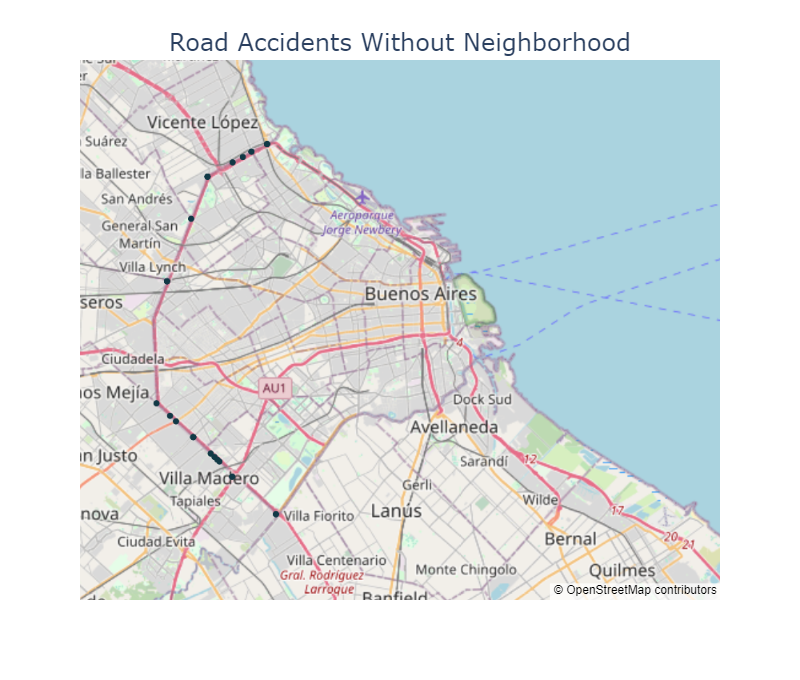

In [15]:
from IPython.display import Image, display
# Image path
image_path = 'images/plot1.png'  

# Show image
display(Image(filename=image_path))

In [16]:
accidents['Comuna'].unique()

array(['Comuna 8', 'Comuna 9', 'Comuna 1', 'Comuna 11', 'Comuna 15',
       'Comuna 4', 'Comuna 7', 'Comuna 12', 'Comuna 3', 'Comuna 13',
       'Comuna 14', 'Comuna 10', 'Comuna 6', 'Comuna 2', 'Comuna 5',
       'Comuna 0'], dtype=object)


In order to respect the information given by the geographical coordinates, we will modify the 'Comuna' column leaving the values ​​at 'Comuna 0' where the coordinates correspond to an empty neighborhood (column 'Barrio').

Additionally, we will put 'Límite o afueras' in the empty values ​​in the 'Barrio' column 

In [17]:
# Condition for empty values in 'Barrio'
condition_barrio_empty = (accidents['Barrio'] == '')

# Assign 'Comuna 0' to 'Comuna' for empty values in 'Barrio'
accidents.loc[condition_barrio_empty, 'Comuna'] = 'Comuna 0'

# Fill empty values in 'Barrio' with 'Límite o afueras'
accidents.loc[condition_barrio_empty, 'Barrio'] = 'Límite o Afueras'

In [18]:
accidents[accidents.Comuna == 'Comuna 0'][['Comuna', 'Barrio', 'Cruce', 'Calle', 'Lugar Del Hecho', 'Pos X', 'Pos Y']]

,Comuna,Barrio,Cruce,Calle,Lugar Del Hecho,Pos X,Pos Y
1,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV DE LOS CORRALES,-58.508775,-34.669777
7,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GENERAL PAZ Y AV DE LOS CORRALES,-58.508775,-34.669777
17,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV 27 DE FEBRERO,-58.462450,-34.705250
27,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ COLECTORA Y ZUVIRIA,-58.496835,-34.678927
33,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV DEL LIBERTADOR,-58.467435,-34.534769
39,Comuna 0,Límite o Afueras,False,"LUGONES, LEOPOLDO AV.",AUTOPISTA LUGONES PK 10000,0.000000,0.000000
41,Comuna 0,Límite o Afueras,True,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,AU LUIS DELLEPIANE Y AV GRAL PAZ,-58.486954,-34.687952
52,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y RODOLFO SCAPINO,-58.498966,-34.677321
69,Comuna 0,Límite o Afueras,True,"PAZ, GRAL. AV.",AV GRAL PAZ Y AV LIBERTADOR,-58.467435,-34.534769
75,Comuna 0,Límite o Afueras,True,MOSCONI GENERAL AV.,AV GRAL MOSCONI Y AV GRAL PAZ,-58.523406,-34.597988


Finally, we going to drop columns without relevant information and reorder columns

In [19]:
accidents.columns

Index(['Hechos_Id', 'Número De Victimas', 'Fecha', 'Año', 'Mes', 'Dia',
       'Día Semana', 'Estación', 'Hora', 'Franja Horaria', 'Lugar Del Hecho',
       'Tipo De Calle', 'Calle', 'Cruce', 'Dirección Normalizada', 'Comuna',
       'XY (CABA)', 'Pos X', 'Pos Y', 'Participantes', 'Víctima', 'Acusado',
       'Rol', 'Sexo', 'Edad', 'Rango Etario', 'Barrio'],
      dtype='object')

In [20]:
columns_to_drop = ['XY (CABA)', 'Dirección Normalizada']

# Drop Columns
accidents = accidents.drop(columns_to_drop, axis=1)


We have found that there are neighborhoods that do not correspond to their respective commune. In order to preserve the fidelity of the geographical location, we are going to correct the 'Comuna' column by assigning the commune to which each neighborhood belongs.

In [21]:
# Create a dictionary that maps each neighborhood to its respective commune
import numpy as np

nbh_commune = {
    'Constitucion': 'Comuna 1', 'Montserrat': 'Comuna 1', 'Puerto Madero': 'Comuna 1', 'Retiro': 'Comuna 1', 'San Nicolas': 'Comuna 1', 'San Telmo': 'Comuna 1',
    'Recoleta': 'Comuna 2',
    'Balvanera': 'Comuna 3', 'San Cristobal': 'Comuna 3',
    'Barracas': 'Comuna 4', 'Boca': 'Comuna 4', 'Nueva Pompeya': 'Comuna 4', 'Parque Patricios': 'Comuna 4',
    'Almagro': 'Comuna 5', 'Boedo': 'Comuna 5',
    'Caballito': 'Comuna 6',
    'Flores': 'Comuna 7', 'Parque Chacabuco': 'Comuna 7',
    'Villa Lugano': 'Comuna 8', 'Villa Riachuelo': 'Comuna 8', 'Villa Soldati': 'Comuna 8',
    'Liniers': 'Comuna 9', 'Mataderos': 'Comuna 9', 'Parque Avellaneda': 'Comuna 9',
    'Floresta': 'Comuna 10', 'Monte Castro': 'Comuna 10', 'Velez Sarsfield': 'Comuna 10', 'Versalles': 'Comuna 10', 'Villa Luro': 'Comuna 10', 'Villa Real': 'Comuna 10',
    'Villa del Parque': 'Comuna 11', 'Villa Devoto': 'Comuna 11', 'Villa Gral. Mitre': 'Comuna 11', 'Villa Santa Rita': 'Comuna 11',
    'Coghlan': 'Comuna 12', 'Saavedra': 'Comuna 12', 'Villa Pueyrredon': 'Comuna 12', 'Villa Urquiza': 'Comuna 12',
    'Belgrano': 'Comuna 13', 'Colegiales': 'Comuna 13', 'Nunez': 'Comuna 13',
    'Palermo': 'Comuna 14',
    'Agronomia': 'Comuna 15', 'Chacarita': 'Comuna 15', 'Parque Chas': 'Comuna 15', 'Paternal': 'Comuna 15', 'Villa Crespo': 'Comuna 15', 'Villa Ortuzar': 'Comuna 15',
    'Límite o Afueras': 'Comuna 0'  
}

# Change values ​​of the 'Comuna' column based on the presence of certain values ​​in the 'Barrio' column
accidents['Comuna'] = np.where(accidents['Barrio'].isin(nbh_commune.keys()), accidents['Barrio'].map(nbh_commune), accidents['Comuna'])

# Show table
accidents.head()


,Hechos_Id,Número De Victimas,Fecha,Año,Mes,Dia,Día Semana,Estación,Hora,Franja Horaria,...,Pos X,Pos Y,Participantes,Víctima,Acusado,Rol,Sexo,Edad,Rango Etario,Barrio
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,Verano,04:00:00,4,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,19-25,Villa Riachuelo
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,Verano,01:15:00,1,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,61+,Límite o Afueras
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,Verano,07:00:00,7,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,26-40,Constitucion
3,2016-0004,1,2016-01-10,2016,Enero,10,Domingo,Verano,00:00:00,0,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,19-25,Villa Lugano
4,2016-0005,1,2016-01-21,2016,Enero,21,Jueves,Verano,05:20:00,5,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,26-40,Constitucion


In [22]:
new_order = [
    'Hechos_Id', 'Número De Victimas', 'Fecha', 'Año', 'Mes', 'Dia',
       'Día Semana', 'Estación', 'Hora', 'Franja Horaria', 'Lugar Del Hecho',
       'Tipo De Calle', 'Calle', 'Cruce', 'Comuna', 'Barrio', 'Pos X',	'Pos Y',
       'Participantes', 'Víctima', 'Acusado',
       'Rol', 'Sexo', 'Edad', 'Rango Etario'
]

accidents = accidents[new_order]
accidents.head(3)

,Hechos_Id,Número De Victimas,Fecha,Año,Mes,Dia,Día Semana,Estación,Hora,Franja Horaria,...,Barrio,Pos X,Pos Y,Participantes,Víctima,Acusado,Rol,Sexo,Edad,Rango Etario
0,2016-0001,1,2016-01-01,2016,Enero,1,Viernes,Verano,04:00:00,4,...,Villa Riachuelo,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,19-25
1,2016-0002,1,2016-01-02,2016,Enero,2,Sábado,Verano,01:15:00,1,...,Límite o Afueras,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,61+
2,2016-0003,1,2016-01-03,2016,Enero,3,Domingo,Verano,07:00:00,7,...,Constitucion,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,26-40


## Web Scrapping
Now. We going to do webs-crapping to get information about the population of the City of Buenos Aires

In [23]:
# Get the url with the info
url = 'https://es.wikipedia.org/wiki/Buenos_Aires'
response = requests.get(url)

In [24]:
soup = BeautifulSoup(response.text, 'html.parser')

Search the table in the url that contains the info we need

In [25]:
# A variable called target_table is initialized as None
target_table = None

# Search for all table tags (<table>) in the HTML content
tables = soup.find_all('table')

# Iterates through all tables found on the web page
for table in tables:
    
# Searches for a header tag (<th>) within the table that has the attributes colspan='3' and class='navbox-title'
    header = table.find('th', {'colspan': '3', 'class': 'navbox-title'})
    
    # Checks if a header was found and if the header text contains "Población histórica"
    if header and "Población histórica" in header.text:
        # If the above condition is met, assign the current table to the target_table variable and exit the for loop with break
        target_table = table
        break

Load table

In [26]:
target_table

<table class="toccolours" style="width:15em;border-spacing: 0;float:right;clear:right;margin:0 0 1em 1em;"><tbody><tr><th class="navbox-title" colspan="3" style="padding:0.25em;font-size:110%">Población histórica</th></tr><tr style="font-size:95%"><th style="border-bottom:1px solid black;padding:1px;width:3em">Año</th><th style="border-bottom:1px solid black;padding:1px 2px;text-align:right"><abbr title="Población">Pob.</abbr></th><th style="border-bottom:1px solid black;padding:1px;text-align:right"><abbr title="Cambio porcentual">±%</abbr></th></tr><tr><th style="text-align:center;padding:1px">1779 </th><td style="text-align:right;padding:1px">24 205</td><td style="text-align:right;padding:1px">—    </td></tr><tr><th style="text-align:center;padding:1px">1810 </th><td style="text-align:right;padding:1px">44 800</td><td style="text-align:right;padding:1px">+85.1%</td></tr><tr><th style="text-align:center;padding:1px">1869 </th><td style="text-align:right;padding:1px">177 797</td><td s

Save the table in a dataframe

In [27]:
# Create lists to store the table columns
years = []
populations = []
changes = []

# initialize a variable to store the current year
current_year = None

# Iterates through the table rows
for row in target_table.find_all('tr'):
    # Searches both th (headers) and td (data cells)
    columns = row.find_all(['th', 'td'])

    #  Ensure there are enough columns to extract Year, Population, and Percentage Change
    if len(columns) >= 3:
        current_year = columns[0].get_text(strip=True)  # Get Year
        population = columns[1].get_text(strip=True)  # Get Population
        change = columns[2].get_text(strip=True)  # Get population changes

        # Add values to respective lists
        years.append(current_year)  
        populations.append(population)  
        changes.append(change)  

# Se crea un DataFrame de Pandas con los datos extraídos
Census = pd.DataFrame({'Year': years, 'Population': populations, 'Change': changes})

print("Saved dataframe correctly")



Saved dataframe correctly


In [28]:
Census

,Year,Population,Change
0,Año,Pob.,±%
1,1779,24 205,—
2,1810,44 800,+85.1%
3,1869,177 797,+296.9%
4,1895,663 854,+273.4%
5,1914,1 575 814,+137.4%
6,1947,2 981 043,+89.2%
7,1960,2 966 634,−0.5%
8,1970,2 972 453,+0.2%
9,1980,2 922 829,−1.7%


Correct the dataframe data

In [29]:
# The first row is removed
Census = Census.iloc[1:]

# The 'Change' column is removed
Census = Census.drop('Change', axis=1)

# The separating spaces of thousands are removed in the 'Population' column
Census['Population'] = Census['Population'].str.replace(' ', '').str.replace('\xa0', '').astype(int)

# Convert 'Year' column to integer type
Census['Year'] = Census['Year'].astype(int)

# Reset index
Census = Census.reset_index(drop=True)



As we only have data from the 2010 and 2022 censuses, we will use the average annual population growth to estimate the population year by year.

In [30]:
# Obtain the population for the year 2010 if there is data
pop_2010 = Census.loc[Census['Year'] == 2010, 'Population'].values[0] if len(Census.loc[Census['Year'] == 2010]) > 0 else None

# Obtain the population for the year 2022 if there is data
pop_2022 = Census.loc[Census['Year'] == 2022, 'Population'].values[0] if len(Census.loc[Census['Year'] == 2022]) > 0 else None

# Check if data was obtained before continuing
if pop_2010 is not None and pop_2022 is not None:
    # Calculate the average annual growth rate
    growth_rate = (pop_2022 / pop_2010) ** (1 / (2022 - 2010)) - 1

    # Generate the list of years from 2010 to 2022
    years = list(range(2010, 2023))

    # Calculate the population for each year using the growth rate
    pop_per_year = [int(pop_2010 * (1 + growth_rate) ** (year - 2010)) for year in years]

    # Print list
    print(pop_per_year)
else:
    print("No data for 2010 and 2022 values.")

[2890151, 2908687, 2927343, 2946119, 2965015, 2984032, 3003171, 3022433, 3041818, 3061328, 3080963, 3100724, 3120612]


In [46]:
data = {'Año': years, 'Población': pop_per_year}
Pop_BsAs = pd.DataFrame(data)
Pop_BsAs

,Año,Población
0,2010,2890151
1,2011,2908687
2,2012,2927343
3,2013,2946119
4,2014,2965015
5,2015,2984032
6,2016,3003171
7,2017,3022433
8,2018,3041818
9,2019,3061328


In [47]:
Pop_BsAs.drop(Pop_BsAs.index[:6], inplace=True)

Pop_BsAs.reset_index(drop=True, inplace=True)

Pop_BsAs

,Año,Población
0,2016,3003171
1,2017,3022433
2,2018,3041818
3,2019,3061328
4,2020,3080963
5,2021,3100724


Save data in cvs files

In [48]:
dfs = [accidents, Pop_BsAs]
# Names corresponding to each DataFrame
names = ['accidents_clean', 'bsas_pop']

ut.save_to_csv(dfs, names)

DataFrame 'accidents_clean' saved as 'data/csv/accidents_clean.csv'
DataFrame 'bsas_pop' saved as 'data/csv/bsas_pop.csv'
